<a href="https://colab.research.google.com/github/vahid-khazaei-nezhad/Data_Science_homework/blob/main/My_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installed libraires

In [1]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 323 kB 5.3 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=9c78c094c49ce16a72b4777010ab051208f9d2da2f3405e742691623a0afc976
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.42-py3-none-any.whl size=322677 sha256=a525e36cbd7e033e238b327d0a178532a12bfe8138a65514c6ba67f51f5a3bb6
  Stored in directory: /root/.cache/pip/wheels/97/31/a0/5ddbb26189896b5d23d83b03bf9a74327a8091a610a6375785
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=90ecce13280f1025a81dcda954709ffb9af604d5fac65e384df5127deee387af
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successful

In [2]:
pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=452f1b088db0e6b733bba09f4e4bb92e2742d4a8be474834df4dddc4a48e99b3
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [3]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.4 MB/s 


In [4]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Libraries

In [6]:
import numpy as np

import cv2

from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from keras_tuner import HyperParameters, BayesianOptimization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history

print('Libraries imported successfully')

Libraries imported successfully


# Loading dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

data = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_2digits_10K.npy') 

labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_2digits_10K_labels.npy')

Mounted at /content/drive


# Cheking the dataset shape, dtype

In [8]:
data.shape

(10000, 32, 32)

In [9]:
data.dtype

dtype('float32')

In [10]:
np.max(data), np.min(data)

(1.0, 0.0)

# Checking digits distributions

In [11]:
histogram = {}

def get_frequencies_of(data, number):
    '''Nothing'''
    
    selected = []
    
    for v in data:
    
        if v[0] == number or v[1] == number:
        
            selected.append(True)
        
        else:
        
            selected.append(False)
        
###

    return len(data[selected]), selected


for i in range(10):
    
    histogram[i] = get_frequencies_of(labels, i)[0]
    

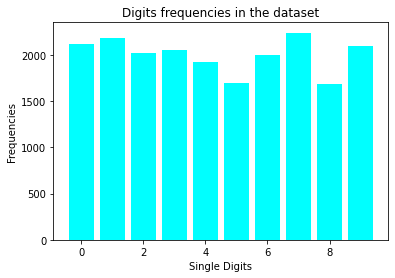

In [12]:

plt.bar(histogram.keys(), histogram.values(), color = 'cyan')   

plt.xlabel('Single Digits')
plt.ylabel('Frequencies')

plt.title('Digits frequencies in the dataset')

plt.show()

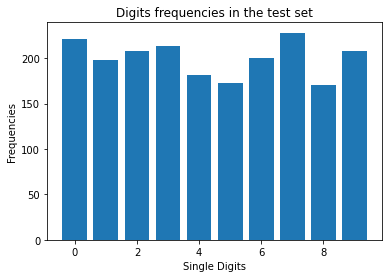

In [13]:
for i in range(10):
    
    histogram[i] = get_frequencies_of(labels[-1000: , :], i)[0]
    
plt.bar(histogram.keys(), histogram.values())   

plt.xlabel('Single Digits')
plt.ylabel('Frequencies')

plt.title('Digits frequencies in the test set')

plt.show()

# Preprocessing

In [14]:
new_size = data[0].shape[0] * 3

resized_images = np.zeros((len(data), new_size, new_size))

for i, v in enumerate(data):

    v = cv2.resize(v, dsize = (new_size, new_size))
    
    resized_images[i] = np.array(cv2.equalizeHist(np.uint8(np.multiply(v, 255))) / 255) #cv2.Canny(np.uint8(np.multiply(v, 255)), 127, 255)

# Concatening labels(two columns) into one target column

In [15]:
target_map = dict()

decoding_map = dict()

combined_labels = [sorted([l[0] ,l[1]]) for l in labels]

combined_labels = [str(l[0]) + str(l[1]) for l in combined_labels]

target_label = np.unique(combined_labels)

for index, value in enumerate(target_label):
    
    target_map[value] = index
    
##
for i, v in target_map.items():

  decoding_map[v] = i

##
combined_labels = [target_map[value] for value in combined_labels]

target = list(target_map)

# Splitting dataset into test & train with its labels

In [16]:
test_percent = 0.1

number_of_classes = len(target)

data_length = len(resized_images)

x_train = resized_images[: -int(data_length * test_percent)]

y_train = combined_labels[: -int(data_length * test_percent) :]

x_test = resized_images[-int(data_length * test_percent) :]

y_test = combined_labels[-int(data_length * test_percent) :]

y_train = to_categorical(y_train, num_classes= number_of_classes, dtype='float32')

y_test = to_categorical(y_test, num_classes= number_of_classes, dtype='float32')

print('Train: ', x_train.shape, end= ', labels: ')
print(y_train.shape)
print('Test:  ', x_test.shape, end= ', labels: ')
print(y_test.shape)

Train:  (9000, 96, 96), labels: (9000, 45)
Test:   (1000, 96, 96), labels: (1000, 45)


# Building CNN Model with keras tuner options

In [35]:
def build_model(hp):
    
    number_of_classes = len(target)
    
    model = Sequential()
    
    model.add(
        Conv2D( 
               hp.Int("filters0", min_value= 64, max_value= 128, step= 8),
               (3, 3),
               input_shape= (new_size, new_size, 1),
               activation= 'relu', 
               padding= hp.Choice('Padding0', ['same', 'valid'])
              )
    )
    
    model.add(MaxPooling2D(pool_size= (2, 2)))
          
    for i in range(1, hp.Int("cnn_layers", min_value= 1, max_value= 4) + 1):
                   
        model.add(
            Conv2D(
                    hp.Int(f"filters{i}", min_value= 32, max_value= 128, step= 8),
                    (3, 3),
                    activation= 'relu',
                    padding= hp.Choice('Padding1', ['same', 'valid'])
                 )
        )
        
        model.add(MaxPooling2D(pool_size= (2, 2)))
        
                
    model.add(BatchNormalization())
        
        ###
    model.add(Flatten())

    drop_rate0 = hp.Float(f'dropout_value0', min_value = 0.2, max_value= 0.5, sampling= "log")

    model.add(Dropout(rate= drop_rate0))
    
    num_of_layers = hp.Int('num_layers', min_value= 1, max_value= 4)
    
    for i in range(1, num_of_layers + 1):
        
        model.add(
            
            Dense(
                
                units= hp.Int(f"units{i}", min_value= 1024, max_value= 2048, step= 256),
                
                activation= hp.Choice(f'activation{i}', ['relu', 'tanh', 'sigmoid']),
            )
        )
    
        drop_rate1 = hp.Float(f'dropout_value{i}', min_value = 0.2, max_value= 0.5, sampling= "log")

        model.add(Dropout(rate= drop_rate1))
                   
    model.add(Dense(number_of_classes, activation= "softmax"))
                   
    learning_rate = hp.Float("learnin_rate", min_value=1e-4, max_value=1e-3, sampling= "log")
    
    momentum = hp.Float("momentum", min_value= 0.1, max_value= 0.9, sampling= "log")
                   
    nesterov = hp.Boolean("nesterov")
    
    opt_selection = hp.Int('Optimizer', min_value= 1, max_value= 4)

    if opt_selection == 1:

      opt = optimizers.SGD(learning_rate= learning_rate, momentum= momentum, nesterov= nesterov)

    elif opt_selection == 2:

      opt = optimizers.RMSprop(learning_rate= learning_rate)

    elif opt_selection == 3:

      opt = optimizers.Adam(learning_rate= learning_rate)

    elif opt_selection == 4:

      opt = optimizers.Nadam(learning_rate= learning_rate)

    model.compile(
        
        optimizer=  opt,
        
        loss= "categorical_crossentropy",
        
        metrics= ["accuracy"],
    )
    
    #print('# paramters: ', model.count_params())
    
    return model

# Tuning model

In [ ]:
tuner = BayesianOptimization(
                            build_model,
                            'val_accuracy',
                            20,
                            num_initial_points= 2,
                            alpha= 0.0001,
                            beta= 2.6,
                            seed= 47,
                            hyperparameters= HyperParameters(),
                            overwrite= True,
                            directory="/Tunning",
                            project_name="InaitTask",
                            )
###
train_datagen = ImageDataGenerator( 
                                    rotation_range= 20, 
                                    width_shift_range= 0.2, 
                                    height_shift_range= 0.2, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True,
                                    fill_mode="nearest" 
                                  ) 

tuner.search(
              train_datagen.flow(
                                x_train.reshape(x_train.shape[0], new_size, new_size, 1),
                                y_train,
                                batch_size= 512, 
                                seed= 27,
                                shuffle= False
                                ),
             epochs= 50, 
             validation_data= (x_test, y_test),
             verbose= 2
             )

###
tuner.results_summary()

Trial 8 Complete [00h 07m 47s]
val_accuracy: 0.7179999947547913

Best val_accuracy So Far: 0.718999981880188
Total elapsed time: 01h 06m 48s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
128               |128               |filters0
same              |same              |Padding0
4                 |4                 |cnn_layers
32                |32                |filters1
valid             |valid             |Padding1
0.2               |0.2               |dropout_value0
4                 |1                 |num_layers
1024              |1024              |units1
sigmoid           |sigmoid           |activation1
0.2               |0.2               |dropout_value1
0.001             |0.001             |learnin_rate
0.1               |0.1               |momentum
False             |False             |nesterov
4                 |4                 |Optimizer
2048              |2048              |units2
sigmoid           |sigmoid           |activation2
0.5 

# Choose best model

In [ ]:
best_model = tuner.get_best_models()[0]

best_model.build(input_shape= (32, 32, 1))

best_model.summary()

# Visualize best model architecture

In [ ]:
keras.utils.plot_model(best_model, to_file="best_model1.png", show_shapes= True) 

# Retraining models + plotting performances

In [ ]:
import datetime

history = best_model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 250, batch_size= 512, verbose= 0)

loss, accuracy = best_model.evaluate(x_test, y_test, verbose= 0)

print(f'Test dataset --> Model loss: {np.round(loss, 2)} - model accuracy: {np.round(accuracy * 100, 1)}%')

ct = datetime.datetime.now()

show_history(history)

plot_history(history, path= f'{int(ct.timestamp())}.png')

plt.close()

# Reverse mapping

In [ ]:
sample = 1

gt = best_model.predict(x_test)

digits = decoding_map[np.where(gt[sample] == max(gt[sample]))[0][0]]

list(digits)

In [ ]:
target_map